# 建立一個交易系統

## 程式實作：空頭反轉型底部反轉交易系統

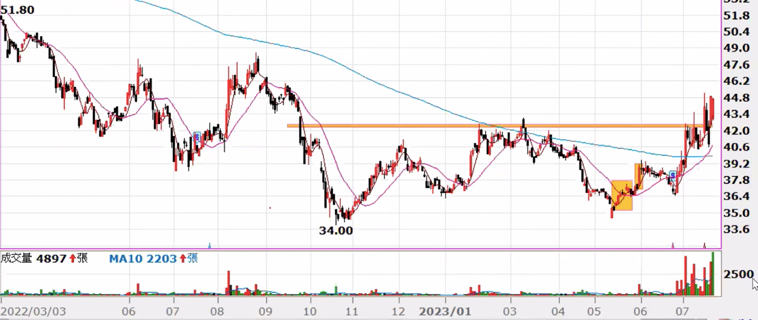

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import mplfinance as mpf
import numpy as np

#### (1) 周ＫＤ黃金交叉

In [2]:
##### 使用2023年1月3日到2023年7月17日之周線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day25(1).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA4','SMA13','SMA26','SMA52','MA4','MA6','K(9,3)','D(9,3)'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA4','MA6','K(9,3)','D(9,3)']) 

# 保存KD指標
df_stoch = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','SMA4','SMA13','SMA26','SMA52','MA4','MA6'])
# 將KD指標由數字轉換為百分比
df_stoch['K(9,3)'] = df_stoch['K(9,3)'] * 100.0
df_stoch['D(9,3)'] = df_stoch['D(9,3)'] * 100.0

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將KD指標的Columns的名稱由中文改為英文
df_stoch = df_stoch.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

# 將KD指標的Date設為Index
df_stoch.set_index(df_stoch['Date'],inplace=True)
df_stoch = df_stoch.drop(columns=['Date'])

In [3]:
def date_to_index(df_in,date_in) :
    number_array = df_in.index == date_in
    idx = 0
    for number_index in number_array :
        if number_index == True :
            break
        idx = idx + 1
    return idx

In [4]:
# 人工方式標示黃金交叉的點
# 黃金交叉點既買點
golden_points_len = len(np.array(df_stoch['D(9,3)']))
golden_points = np.array([np.nan]*golden_points_len)
idx = date_to_index(df_stoch,'2023-05-22')
golden_points[idx] = df_stoch.iloc[idx]['D(9,3)']

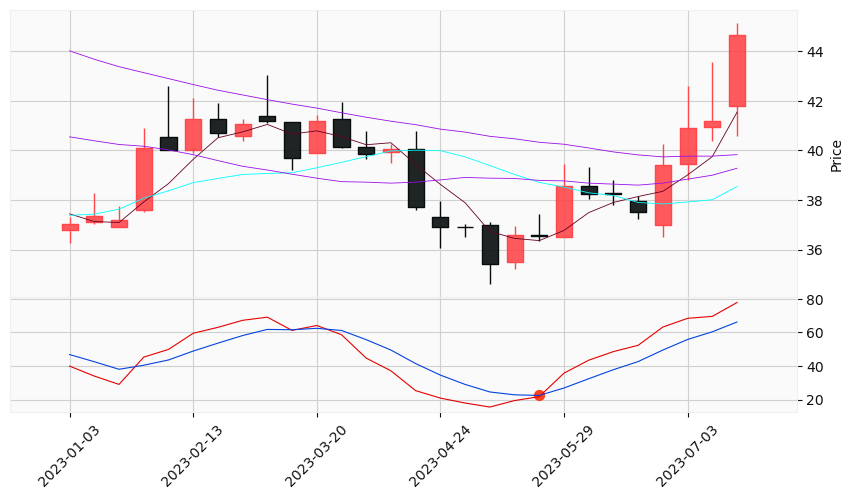

In [5]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定移動平均線與KD指標
added_plots={
    "SMA4": mpf.make_addplot(df_sma['SMA4'],width=0.6,color='xkcd:maroon'),
    "SMA13": mpf.make_addplot(df_sma['SMA13'],width=0.6,color='xkcd:cyan'),
    "SMA26": mpf.make_addplot(df_sma['SMA26'],width=0.6,color='xkcd:violet'),
    "SMA52": mpf.make_addplot(df_sma['SMA52'],width=0.6,color='xkcd:violet'),
    'K(9,3)': mpf.make_addplot(df_stoch['K(9,3)'],width=0.8,panel=1,color='xkcd:red'),
    'D(9,3)': mpf.make_addplot(df_stoch['D(9,3)'],width=0.8,panel=1,color='xkcd:blue'),
    'Golden': mpf.make_addplot(golden_points,panel=1,type='scatter',marker='o',markersize=50,color='xkcd:orange red') 
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)

In [6]:
##### 使用2022年3月3日到2023年7月21日之日線圖資料 #####

# 載入從「好神通PLUS」輸出的Excel檔
df = pd.read_excel('Day25(2).xlsx')

# 保存K線的基本資訊(開、高、低、收、量)
df_k_line = df.drop(columns=['SMA5','SMA20','SMA240','MA5','MA10'])

# 保存價的移動平均線
df_sma = df.drop(columns=['開盤價','最高價','最低價','收盤價','成交量','MA5','MA10']) 

# 將K線的Columns的名稱由中文改為英文
df_k_line = df_k_line.rename(columns={'時間':'Date','開盤價':'Open','最高價':'High','最低價':'Low','收盤價':'Close','成交量':'Volume'})

# 將價的移動平均線的Columns的名稱由中文改為英文
df_sma = df_sma.rename(columns={'時間':'Date'})

# 將K線的Date設為Index
df_k_line.set_index(df_k_line['Date'],inplace=True)
df_k_line = df_k_line.drop(columns=['Date'])

# 將價的移動平均線的Date設為Index
df_sma.set_index(df_sma['Date'],inplace=True)
df_sma = df_sma.drop(columns=['Date'])

In [7]:
# 人工方式標示週KD黃金交叉的點
golden_points_len = len(np.array(df_k_line['Close']))
golden_points = np.array([np.nan]*golden_points_len)
idx = date_to_index(df_k_line,'2023-05-26')
golden_points[idx] = df_k_line.iloc[idx]['Close']

#### (2) 站上20日線且20日線上揚

In [8]:
# 人工方式標示站上20日線且20日線上揚之買點
ma20buy_points_len = len(np.array(df_k_line['Close']))
ma20buy_points = np.array([np.nan]*ma20buy_points_len)
idx = date_to_index(df_k_line,'2023-05-31')
ma20buy_points[idx] = df_k_line.iloc[idx]['Close']

#### (3) 要有底部型態　

In [9]:
# 人工方式標示W底頸線
neckline_price = df_k_line.loc['2023-03-08']['Close']
neckline_start_date = '2022-09-20'
neckline_end_date = '2023-07-21'

In [10]:
# 人工方式標示突破點
breaking_points_len = len(np.array(df_k_line['Close']))
breaking_points = np.array([np.nan]*breaking_points_len)
idx = date_to_index(df_k_line,'2023-07-17')
breaking_points[idx] = neckline_price

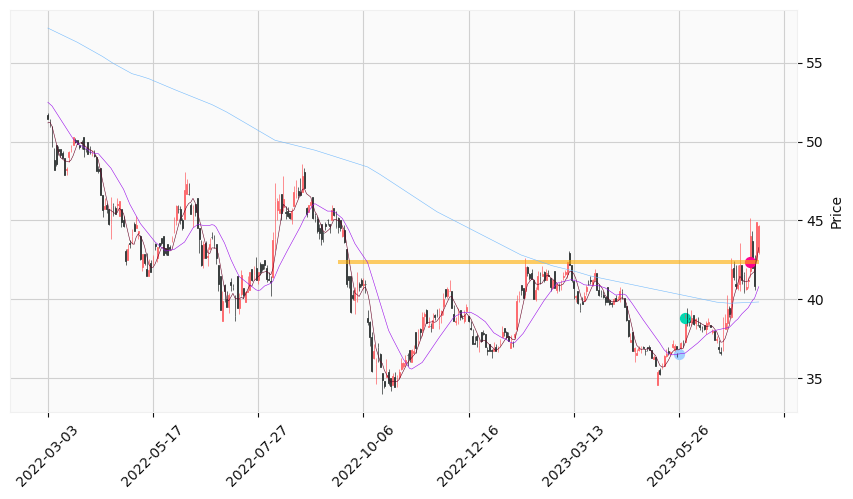

In [11]:
# 設定K線格式
mc = mpf.make_marketcolors(up='xkcd:light red', down='xkcd:almost black', inherit=True)
s  = mpf.make_mpf_style(base_mpf_style='yahoo', marketcolors=mc)

# 設定與頸線
seq_of_seq_of_points=[
    [(neckline_start_date,neckline_price),(neckline_end_date,neckline_price)],
                     ]

# 設定買點與移動平均線
added_plots={
    "GOLDEN" : mpf.make_addplot(golden_points,type='scatter',marker='o',markersize=50,color='xkcd:baby blue'),
    "MA20BUY" : mpf.make_addplot(ma20buy_points,type='scatter',marker='o',markersize=50,color='xkcd:aquamarine'),
    "BREAK" : mpf.make_addplot(breaking_points,type='scatter',marker='o',markersize=50,color='xkcd:hot pink'), 
    "SMA5": mpf.make_addplot(df_sma['SMA5'],width=0.4,color='xkcd:maroon'),
    "SMA20": mpf.make_addplot(df_sma['SMA20'],width=0.4,color='xkcd:violet'),
    "SMA240": mpf.make_addplot(df_sma['SMA240'],width=0.4,color='xkcd:sky blue')
            }

# 繪出K線圖
kwargs = dict(type='candle', style=s, figratio=(19,10), addplot=list(added_plots.values()), alines=dict(alines=seq_of_seq_of_points, linewidths=1.5, colors='xkcd:orange yellow', alpha=0.6),datetime_format='%Y-%m-%d')
mpf.plot(df_k_line,**kwargs)